## ANOVA

In [1]:
library(tidyverse)
library(plotly)
library(BSDA)
library(MASS)
library(AID)
library(car)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config


Loading required package: lattice


Attaching package: ‘BSDA’


The following object is masked from ‘package:datasets’:

    Orange



Attaching package: ‘MASS’


The following object is masked from ‘package:plotly’:

    select


The following object is masked from ‘package:dplyr’:

    select


Regis

In [2]:
# Read data
df = scan(text="145 152 150 150 150 149 153 147 152 148 155 151 141 140 142 152 146 141 146 158 145 154 152 152 139 151 153 148 143 142")
dm = matrix(df, ncol=3, byrow=T)
anova = as.data.frame(dm)
colnames(anova) = c("garam", "minyak", "murni")
anova

garam,minyak,murni
<dbl>,<dbl>,<dbl>
145,152,150
150,150,149
153,147,152
148,155,151
141,140,142
152,146,141
146,158,145
154,152,152
139,151,153


In [3]:
# Transform to long format
anova1<-anova%>%
    gather(key="jenis.rendaman",value="hasil.pengerasan")
head(anova1)

# alternative, newer version
anova1c = anova %>%
    pivot_longer(cols=1:3, names_to="jenis.rendaman", values_to="hasil_pengerasan")
head(anova1c)

,jenis.rendaman,hasil.pengerasan
,<chr>,<dbl>
1,garam,145
2,garam,150
3,garam,153
4,garam,148
5,garam,141
6,garam,152


jenis.rendaman,hasil_pengerasan
<chr>,<dbl>
garam,145
minyak,152
murni,150
garam,150
minyak,150
murni,149


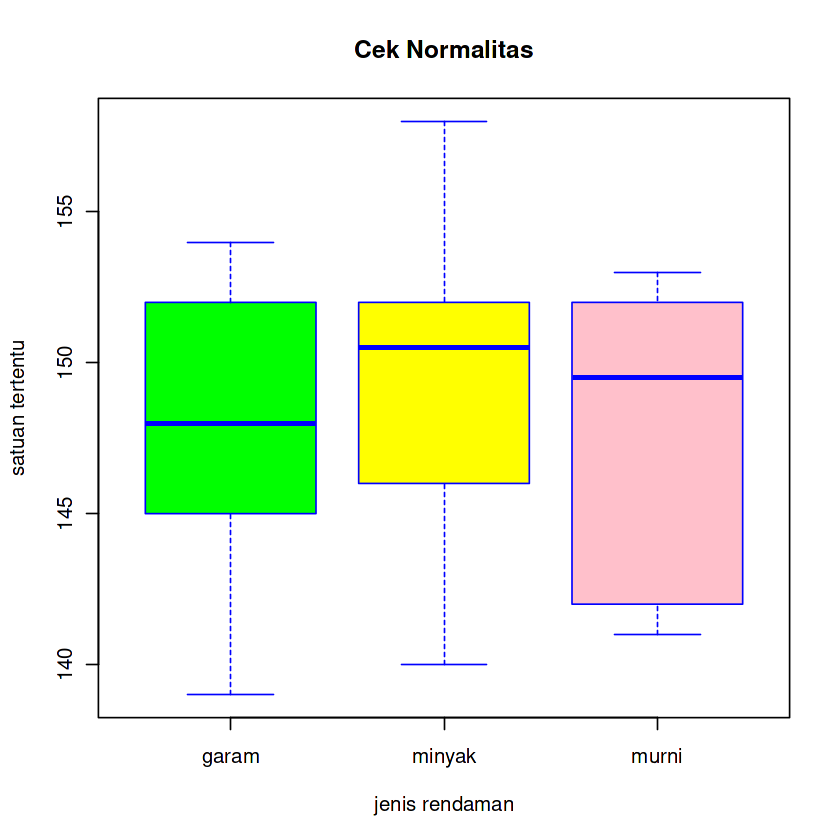

In [4]:
#Cek asumsi
#1. Normalitas data
cek_nor<-boxplot(anova[1:3],col=c("green","yellow","pink"),
                 border="blue",
                 xlab="jenis rendaman",
                 ylab="satuan tertentu",
                 main="Cek Normalitas")


In [5]:

#Transformasi Data
#1. Transformasi Box-cox dengan library AID
out = boxcoxnc(anova1$hasil.pengerasan, method = "mle", 
               lambda = seq(-5,5,0.001), verbose = F, plot = F)
out$lambda.hat

#2. Transformasi Box-cox dengan library MASS
out = boxcox(anova1$hasil.pengerasan~1, lambda = seq(-5,5,0.0001), plotit = F)
out$x[which.max(out$y)]

#3.Transformasi Box-cox dengan library car
out = powerTransform(anova1$hasil.pengerasan, family = "bcPower")
out$lambda


[1] 4.638

[1] 4.6382

anova1$hasil.pengerasan 
               4.638202

In [6]:
#setiap datum dipangkatkan dengan 5
transformasi.bc=function(data, lambda){
  for(i in 1:length(data)){
    data[i]=data[i]^lambda
  }
  return(data)
}

#data hasil transformasi, then, buang data asli
anova2=anova1 %>% 
  mutate(transformasi=transformasi.bc(anova1$hasil.pengerasan,5))%>%
  dplyr::select(-hasil.pengerasan)


# nah, no need fungsi
anova2=anova1 %>% 
  mutate(transformasi=hasil.pengerasan^5)%>%
  dplyr::select(-hasil.pengerasan)

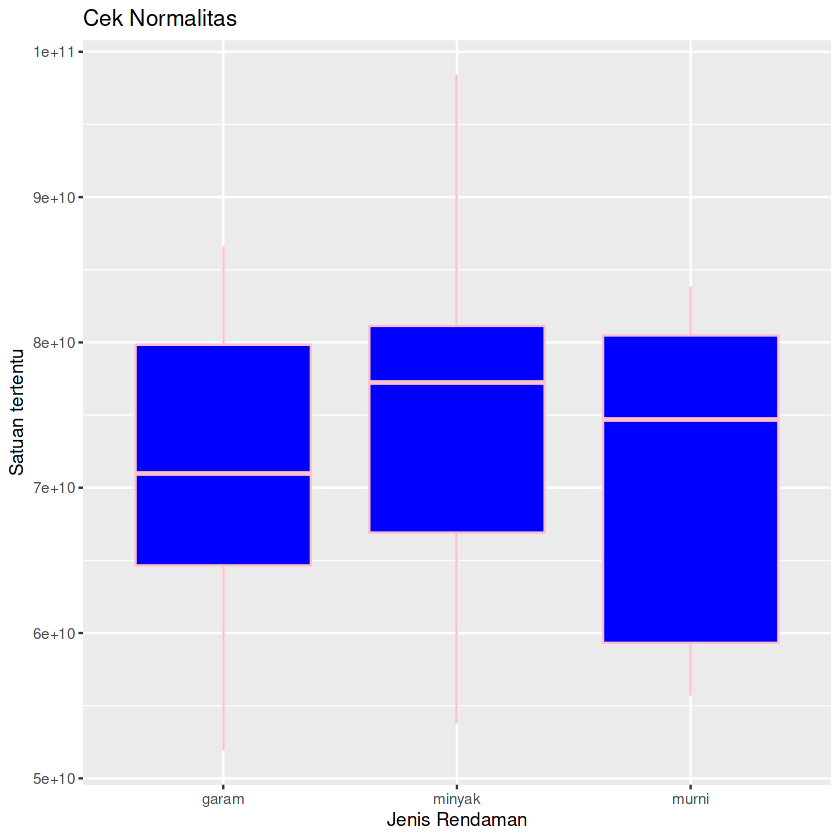

In [7]:

#cek normalitas setelah data ditransformasi
cek_norm1<-ggplot(anova2, aes(x=jenis.rendaman,y=transformasi))+
  geom_boxplot(fill="blue",color="pink")+
  ggtitle("Cek Normalitas")+
  xlab("Jenis Rendaman")+
  ylab("Satuan tertentu")

cek_norm1

In [8]:
#2. Asumsi Kesamaan Variansi
cek_var<-anova2 %>% 
  group_by(jenis.rendaman) %>% 
  summarise(var(transformasi))

#jika var tertinggi > 3 variansi rendah, maka terjadi heterogenitas variansi
max(cek_var$`var(transformasi)`) > 3*min(cek_var$`var(transformasi)`)


[1] FALSE

In [9]:
#Uji Anova
anova3<-aov(transformasi~jenis.rendaman,data=anova2)
anova3

summary(anova3)

#F tabel
qf(0.95,2,27)

Call:
   aov(formula = transformasi ~ jenis.rendaman, data = anova2)

Terms:
                jenis.rendaman    Residuals
Sum of Squares    1.336832e+20 3.936908e+21
Deg. of Freedom              2           27

Residual standard error: 12075239226
Estimated effects may be unbalanced

               Df    Sum Sq   Mean Sq F value Pr(>F)
jenis.rendaman  2 1.337e+20 6.684e+19   0.458  0.637
Residuals      27 3.937e+21 1.458e+20               

[1] 3.354131

### Latihan Soal

### No. 1

In [10]:
# nomor 1
df1 = scan(text="8 14 10 7 16 12 9 12 16 13 17 15 10 11 12")
df1 = as.data.frame(matrix(df1, ncol=3, byrow=T))
colnames(df1) = c("tanpa", "ringan", "full")
df1

tanpa,ringan,full
<dbl>,<dbl>,<dbl>
8,14,10
7,16,12
9,12,16
13,17,15
10,11,12


sarapan,waktu
<chr>,<dbl>
tanpa,8
ringan,14
full,10
tanpa,7
ringan,16
full,12


sarapan,var
<chr>,<dbl>
full,6.0
ringan,6.5
tanpa,5.3


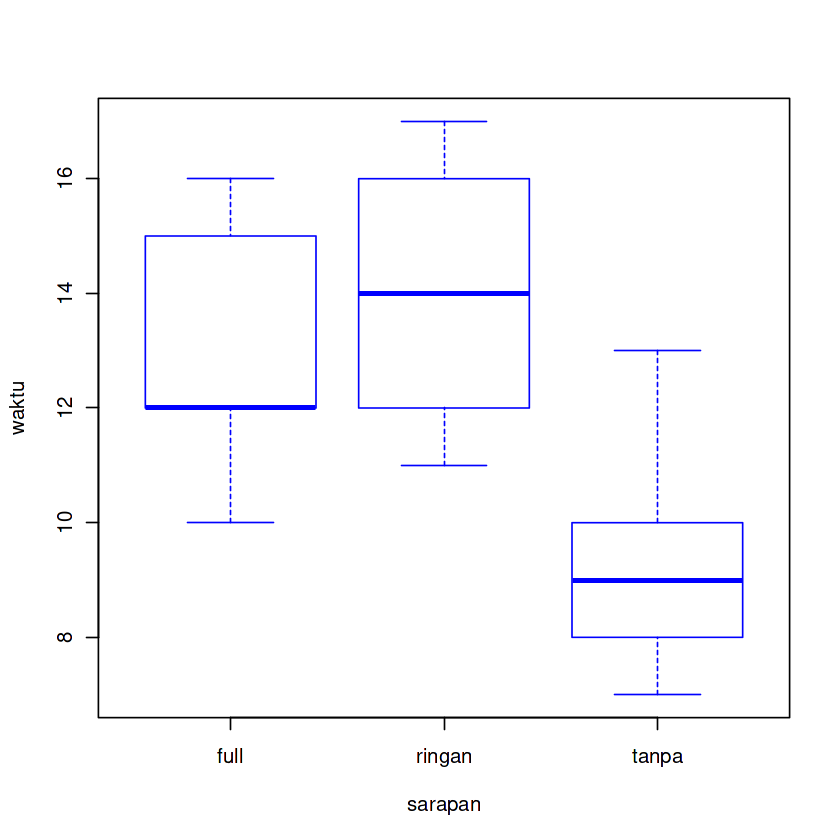

In [11]:
# Uji Asumsi
# to longer, df1
df1L = pivot_longer(df1, cols=1:3, names_to="sarapan", values_to="waktu")
head(df1L)

# boxplot: jurai bawah, normal, atas: well kinda normal
# sebarannya juga lumayan mirip
boxplot(waktu~sarapan, df1L, col="white", border="blue")

# variansi, aman juga
df1L %>% group_by(sarapan) %>% summarise(var = var(waktu))



  Box-Cox power transformation 
--------------------------------------------------------------------- 

  lambda.hat : 0.32 


  Shapiro-Wilk normality test for transformed data (alpha = 0.05)
------------------------------------------------------------------- 
   Level statistic   p.value Normality
1   full 0.9291860 0.5908305       YES
2 ringan 0.9434194 0.6902038       YES
3  tanpa 0.9689777 0.8686525       YES


  Bartlett's homogeneity test for transformed data (alpha = 0.05)
------------------------------------------------------------------- 
  Level  statistic   p.value Homogeneity
1   All 0.07865173 0.9614374         YES
--------------------------------------------------------------------- 



[1] 0.3


  Box-Cox power transformation 
------------------------------------------------------------------- 

  lambda.hat : 0.73 


  Shapiro-Wilk normality test for transformed data (alpha = 0.05)
------------------------------------------------------------------- 

  statistic  : 0.9674354 
  p.value    : 0.8184276 

  Result     : Transformed data are normal. 
------------------------------------------------------------------- 



[1] 0.8

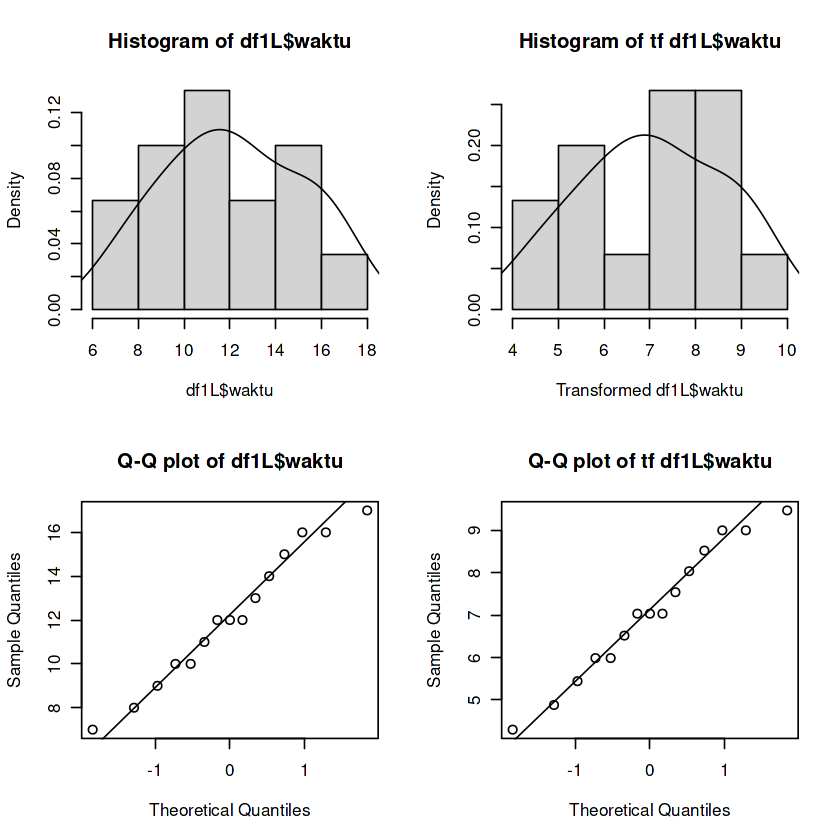

In [12]:
# Transformasi khusus ANOVA, kalau mau
# Perlukah transformasi? AID::boxcoxfr dan MASS::boxcox

# banyak angkatan 0.3an, untuk anova, pakai ini.
boxcoxfr(df1L$waktu, df1L$sarapan)

bc = boxcox(waktu~sarapan, data=df1L, plot=F)
bc$x[which.max(bc$y)]

# dijadikan 1, 0.7an
boxcoxnc(df1L$waktu)

bc = boxcox(waktu~1, data=df1L, plot=F)
bc$x[which.max(bc$y)]


# transformasi akar.
# namun, tidak dilakukan karena data yang sangat sedikit.

In [13]:
# Uji Anova
aov1 = aov(waktu~sarapan, data=df1L)

# waw, signifikan
summary(aov1)

# F tabel
qf(0.95,2,27)


            Df Sum Sq Mean Sq F value Pr(>F)  
sarapan      2  58.53  29.267   4.933 0.0273 *
Residuals   12  71.20   5.933                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] 3.354131


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




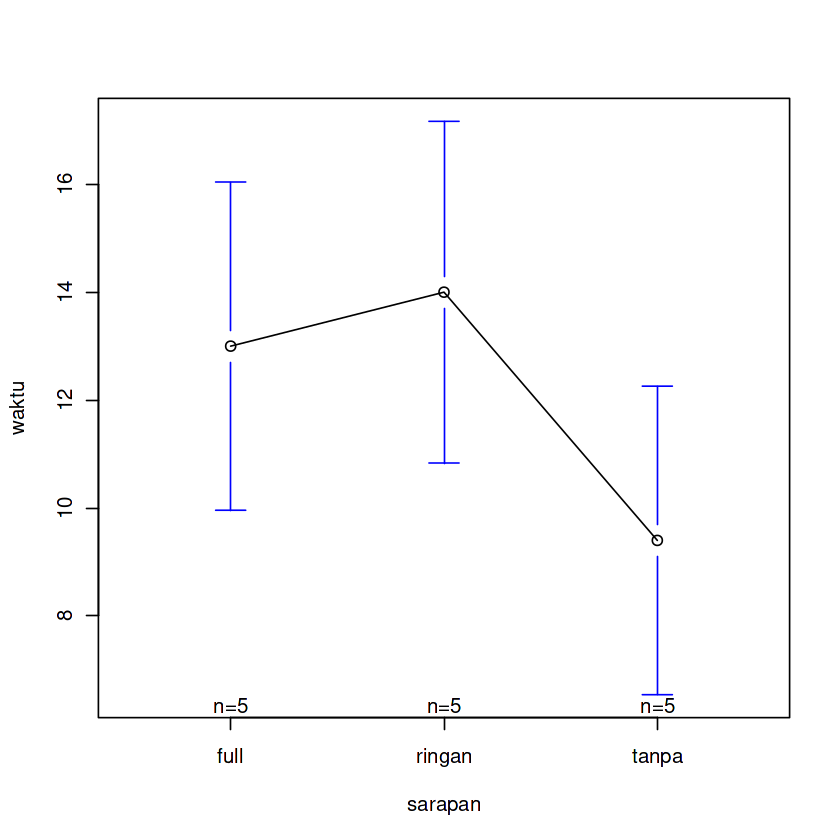

In [14]:
# Extras, posthoc test
# Viz
library(gplots)
plotmeans(waktu~sarapan, df1L)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = waktu ~ sarapan, data = df1L)

$sarapan
             diff       lwr        upr     p adj
ringan-full   1.0 -3.110011  5.1100111 0.7963670
tanpa-full   -3.6 -7.710011  0.5100111 0.0886624
tanpa-ringan -4.6 -8.710011 -0.4899889 0.0284289



	Pairwise comparisons using t tests with pooled SD 

data:  df1L$waktu and df1L$sarapan 

       full  ringan
ringan 0.528 -     
tanpa  0.075 0.034 

P value adjustment method: holm 

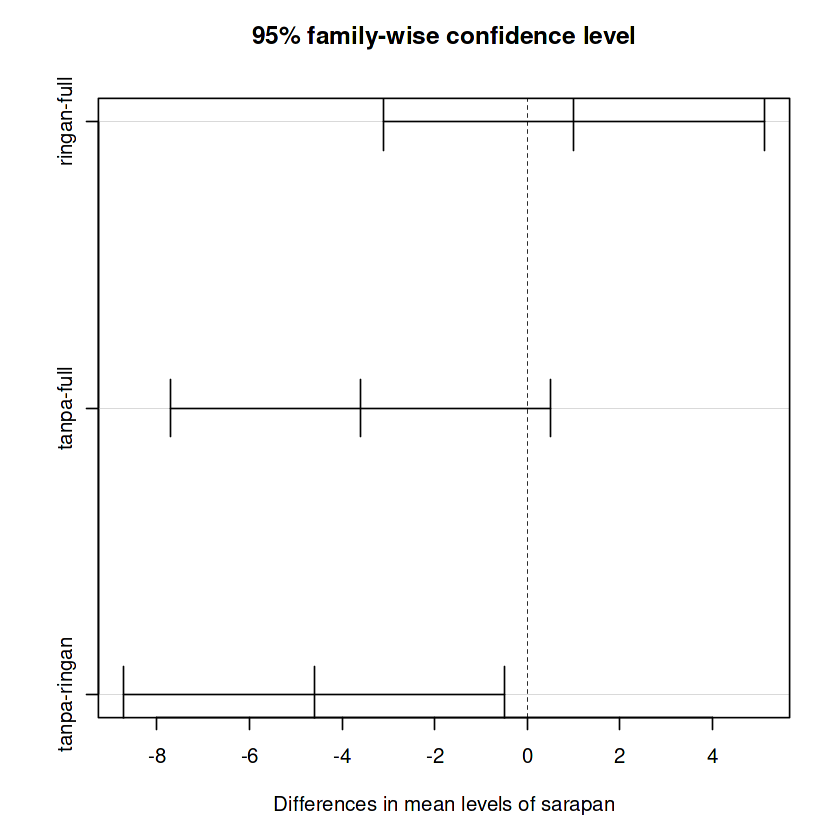

In [15]:
# seluruh pasang, reference (placebo), DIY 
# Tukey HSD, Dunnet, Bonferroni correction
hsd1 = TukeyHSD(aov1)
hsd1; plot(hsd1)

pairwise.t.test(x=df1L$waktu, df1L$sarapan,"holm")

### No. 2

In [16]:
# Nomor 2
df2 = scan(text="78 82 75 85 88 77 90 92 70 72 85 68 88 87 76 82 91 78 76 86 73 80 89 74 
79 83 72 83 84 79 75 90 71 77 85 75 86 88 72 89 84 78 81 86 73 74 82 77 87 87 75 84 83 80 80 85 76 76 89 73 75 87 72 73 
90 74 85 88 75 88 83 71 82 89 78 79 85 73 80 87 76 87 92 75 83 84 79 76 86 77 78 88 80")

df2 = as.data.frame(matrix(df2, ncol=3, byrow=T))
colnames(df2) = c("A", "B", "C")

head(df2)
str(df2)

,A,B,C
,<dbl>,<dbl>,<dbl>
1,78,82,75
2,85,88,77
3,90,92,70
4,72,85,68
5,88,87,76
6,82,91,78


'data.frame':	31 obs. of  3 variables:
 $ A: num  78 85 90 72 88 82 76 80 79 83 ...
 $ B: num  82 88 92 85 87 91 86 89 83 84 ...
 $ C: num  75 77 70 68 76 78 73 74 72 79 ...


sekolah,nilai
<chr>,<dbl>
A,78
B,82
C,75
A,85
B,88
C,77


sekolah,KS,SW
<chr>,<dbl>,<dbl>
A,0.7468788,0.4210535
B,0.5479888,0.4199970
C,0.7017733,0.7277100


sekolah,var
<chr>,<dbl>
A,25.890323
B,7.978495
C,9.156989


[1] 3.245013

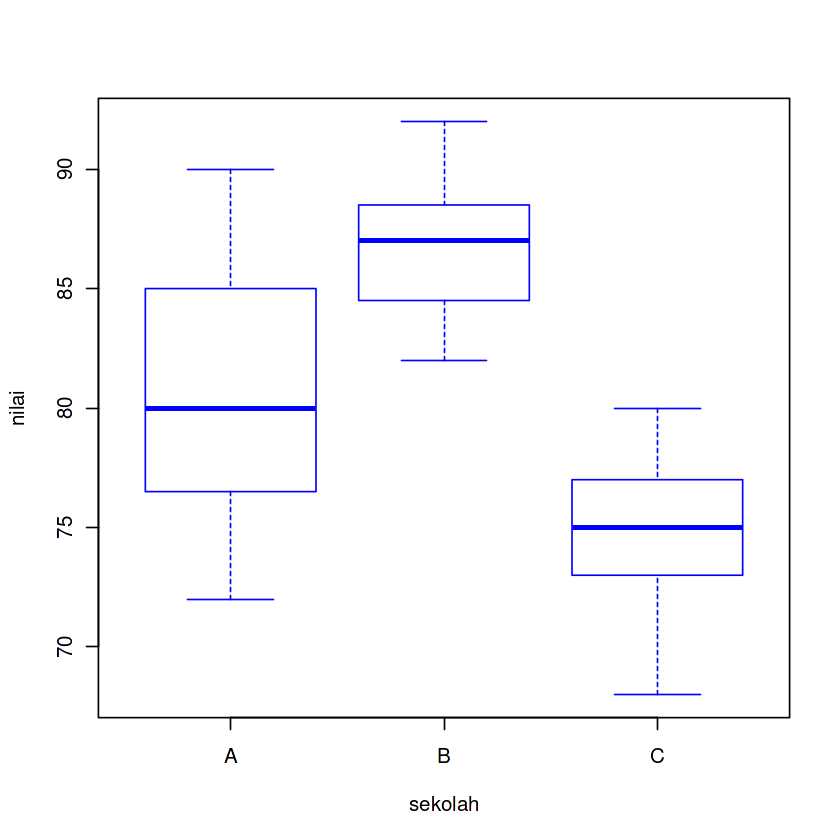

In [17]:

# to longer, df1
df2L = pivot_longer(df2, cols=1:3, names_to="sekolah", values_to="nilai")
head(df2L)

# Uji Asumsi
library(nortest) # lillie, KS test SPSS

# boxplot: sedikit jurai atas, well, normal?, agak jurai bawah: cukup aman
# sebarannya beda2
boxplot(nilai~sekolah, df2L, col="white", border="blue")

# 
df2L %>% group_by(sekolah) %>% summarise(KS = lillie.test(nilai)$p.value,
                                         SW = shapiro.test(nilai)$p.value)

# variansi, kagak aman
v2 = df2L %>% group_by(sekolah) %>% summarise(var = var(nilai))
v2; max(v2$var)/min(v2$var)

**Boxcox**
1. `boxcoxfr()` -> untuk menormalisasi nilai berdasarkan angkatan, bisa untuk homogenitas juga, dengan parameter `option`
1. `boxcoxnc()` -> untuk menormalisasi nilai secara keseluruhan
1. `boxcox()`, dua-duanya
    1. keseluruhan -> `boxcox(nilai~1, data)`
    1. berdasarkan kelompok -> `boxcox(nilai~kelompok, data)`
    1. biasanya, hasilnya mirip2 sih.

In [18]:
# Transformasi khusus ANOVA
# Perlukah transformasi? AID::boxcoxfr
boxcoxfr(df2L$nilai, df2L$sekolah, lambda=seq(-5,5,0.01), tau=0.0)



  Box-Cox power transformation 
--------------------------------------------------------------------- 

  lambda.hat : 0.89 


  Shapiro-Wilk normality test for transformed data (alpha = 0.05)
------------------------------------------------------------------- 
  Level statistic   p.value Normality
1     A 0.9664165 0.4262298       YES
2     B 0.9663037 0.4235096       YES
3     C 0.9769316 0.7231322       YES


  Bartlett's homogeneity test for transformed data (alpha = 0.05)
------------------------------------------------------------------- 
  Level statistic     p.value Homogeneity
1   All  13.14828 0.001396006          NO
--------------------------------------------------------------------- 



In [19]:
# Uji Anova
aov2 = aov(nilai~sekolah, data=df2L)

# waw, signifikan
summary(aov2)

            Df Sum Sq Mean Sq F value Pr(>F)    
sekolah      2   2126  1062.9   74.11 <2e-16 ***
Residuals   90   1291    14.3                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = nilai ~ sekolah, data = df2L)

$sekolah
          diff        lwr       upr p adj
B-A   5.709677   3.417329  8.002025 2e-07
C-A  -6.000000  -8.292348 -3.707652 0e+00
C-B -11.709677 -14.002025 -9.417329 0e+00



	Pairwise comparisons using t tests with pooled SD 

data:  df2L$nilai and df2L$sekolah 

  A       B      
B 1.6e-07 -      
C 4.3e-08 < 2e-16

P value adjustment method: bonferroni 

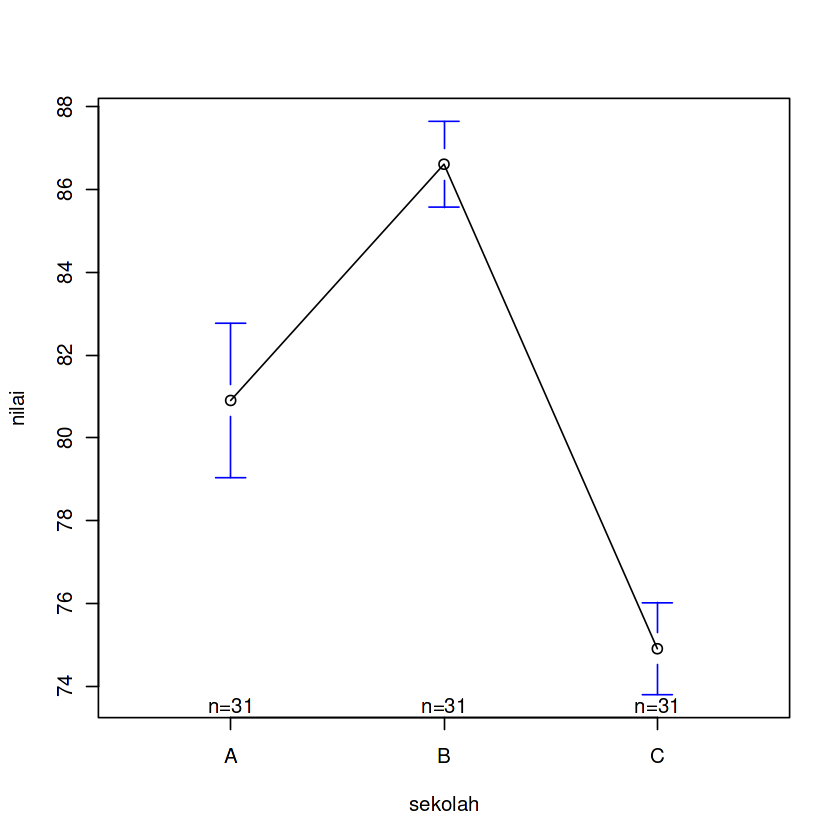

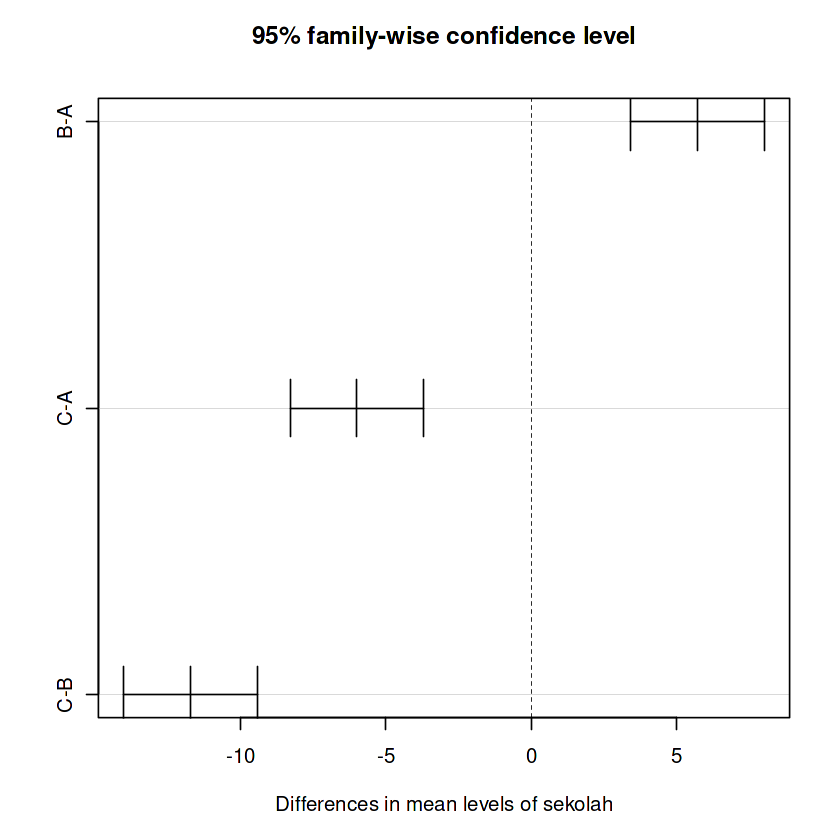

In [20]:
# Extras, posthoc test
# Viz
library(gplots)
plotmeans(nilai~sekolah, data=df2L)

# mean nilai ketiga sekolah berbeda
TukeyHSD(aov2)
pairwise.t.test(df2L$nilai, df2L$sekolah, p.adjust="bonf")

# Plot THSD, semuanya, signifikan != 0
plot(TukeyHSD(aov2))